In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.20.1.


<h1> TASK <\h1> :-


- Use bag of words upto 4 grams and compute the micro f1 score with Logistic regression(OvR)


- Perform hyperparam tuning on alpha (or lambda) for Logistic regression to improve the performance using GridSearch


- Try OneVsRestClassifier with Linear-SVM (SGDClassifier with loss-hinge)

<h1> STACK OVERFLOW TAG PREDICTION ASSIGNMENT </h1>

In [3]:
!ls

20_02_2019_final_(2).ipynb  Train.csv  Train.zip


In [4]:
!pip install --user scikit-multilearn

In [5]:
!pip3 install wordcloud

In [6]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import pickle
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV


# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [7]:
#checking file is present or not
if not os.path.isfile('train.db'):
    start = datetime.now()
    #creating database file
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    #instead of loading all data i am breaking data into chunks to load
    chunksize = 18000
    j = 0
    index_start = 1
    #Reading csv file
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')      
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

18000 rows
36000 rows
54000 rows
72000 rows
90000 rows
108000 rows
126000 rows
144000 rows
162000 rows
180000 rows
198000 rows
216000 rows
234000 rows
252000 rows
270000 rows
288000 rows
306000 rows
324000 rows
342000 rows
360000 rows
378000 rows
396000 rows
414000 rows
432000 rows
450000 rows
468000 rows
486000 rows
504000 rows
522000 rows
540000 rows
558000 rows
576000 rows
594000 rows
612000 rows
630000 rows
648000 rows
666000 rows
684000 rows
702000 rows
720000 rows
738000 rows
756000 rows
774000 rows
792000 rows
810000 rows
828000 rows
846000 rows
864000 rows
882000 rows
900000 rows
918000 rows
936000 rows
954000 rows
972000 rows
990000 rows
1008000 rows
1026000 rows
1044000 rows
1062000 rows
1080000 rows
1098000 rows
1116000 rows
1134000 rows
1152000 rows
1170000 rows
1188000 rows
1206000 rows
1224000 rows
1242000 rows
1260000 rows
1278000 rows
1296000 rows
1314000 rows
1332000 rows
1350000 rows
1368000 rows
1386000 rows
1404000 rows
1422000 rows
1440000 rows
1458000 rows
1476000

<h3> 3.1.2 Counting the number of rows </h3>

In [8]:
#checking file is present or not
if os.path.isfile('train.db'):
    start = datetime.now()
    #creating a database file
    con = sqlite3.connect('train.db')
    #Reading sql file
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:00:00.082396


<h3>3.1.3 Checking for duplicates </h3>

In [9]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
#Checking file is present or not
if os.path.isfile('train.db'):
    start = datetime.now()
    #connecting database file
    con = sqlite3.connect('train.db')
    #Reading file
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    #dont forget to close file always close file
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:01:19.920156


In [10]:
#printing first five rows
df_no_dup.head()
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


<h3> observation:- </h3>

see 2nd and 3rd row It had duplicate questions  i have to drop duplicates questions

In [11]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 1827881 ( 30.292038906260256 % )


In [12]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [13]:
#Checking null values are present
df_no_dup["Tags"].isnull().sum()


7

In [14]:
df_no_dup[df_no_dup["Tags"].isnull()]


,Title,Body,Tags,cnt_dup
777547,Do we really need NULL?,<blockquote>\n <p><strong>Possible Duplicate:...,None,1
962680,Find all values that are not null and not in a...,<p>I am running into a problem which results i...,None,1
1126558,Handle NullObjects,<p>I have done quite a bit of research on best...,None,1
1256102,How do Germans call null,"<p>In german null means 0, so how do they call...",None,1
2430668,Page cannot be null. Please ensure that this o...,<p>I get this error when i remove dynamically ...,None,1
3329908,"What is the difference between NULL and ""0""?","<p>What is the difference from NULL and ""0""?</...",None,1
3551595,a bit of difference between null and space,<p>I was just reading this quote</p>\n\n<block...,None,2


In [15]:
#it drops the missing values
df_no_dup = df_no_dup.dropna(axis = 0)


In [16]:
df_no_dup = df_no_dup.drop_duplicates(subset={'Title', 'Body', 'Tags'})


In [17]:
start = datetime.now()
#Splitting text in tags
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")) if text!=None else 0)
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

Time taken to run this cell : 0:00:02.905762


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [18]:
#knowing length and converts the specified value into a string.
df_no_dup['Titlelen'] = df_no_dup['Title'].str.len() 

In [19]:
#splitting the row
df_no_dup['Title_words'] = df_no_dup['Title'].apply(lambda row: len(row.split(" ")))

In [20]:
#splitting the row
df_no_dup['Body_words'] = df_no_dup['Body'].apply(lambda row: len(row.split(" ")))

In [21]:
def normalized_word_Common(row):
        #converting characters into lower case and returns a copy of the string with both leading and trailing characters removed (based on the string argument passed).
    w1 = set(map(lambda word: word.lower().strip(), row['Title'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['Body'].split(" ")))    
    return 1.0 * len(w1 & w2)
df_no_dup['word_Common_Title and body'] = df_no_dup.apply(normalized_word_Common, axis=1)

    
#building function 
def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['Title'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['Body'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
df_no_dup['word_Total'] = df_no_dup.apply(normalized_word_Total, axis=1)
#building function 
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['Title'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['Body'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df_no_dup['word_share'] = df_no_dup.apply(normalized_word_share, axis=1)
#combining two variables
df_no_dup['freq_Title'] = df_no_dup.groupby('Title')['Title'].transform('count')
df_no_dup['freq_Body'] = df_no_dup.groupby('Body')['Body'].transform('count')

df_no_dup['freq_q1+q2'] = df_no_dup['freq_Title']+df_no_dup['freq_Body']
df_no_dup['freq_q1-q2'] = abs(df_no_dup['freq_Title']-df_no_dup['freq_Body'])
#creating csv file
df_no_dup.to_csv("df_no_dup_without_preprocessing_train.csv", index=False)
#printing first five rows
df_no_dup.head()

,Title,Body,Tags,cnt_dup,tag_count,Titlelen,Title_words,Body_words,word_Common_Title and body,word_Total,word_share,freq_Title,freq_Body,freq_q1+q2,freq_q1-q2
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2,79,16,994,4.0,113.0,0.035398,1,1,2,0
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3,44,9,105,4.0,73.0,0.054795,2,2,4,0
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4,44,9,105,4.0,73.0,0.054795,2,2,4,0
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2,80,6,77,1.0,60.0,0.016667,1,1,2,0
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2,83,10,182,5.0,76.0,0.065789,1,1,2,0


<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [22]:
#printing minimum length of questions in title
print ("Minimum length of the Text in Title : " , min(df_no_dup['Title_words']))
#printing minimum length of questions in body
print ("Minimum length of the Text in Body : " , min(df_no_dup['Body_words']))


Minimum length of the Text in Title :  1
Minimum length of the Text in Body :  1


In [23]:
#Removing question without any tags¶

df_no_dup = df_no_dup[df_no_dup['tag_count']!=0]


In [24]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

In [25]:
#Creating a new database with no duplicates
#checking file is present or not
if not os.path.isfile('train_no_dup.db'):
    #creating database file
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    #creating dataframe and placing values
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags','cnt_dup','tag_count','Titlelen','Title_words','word_Common_Title and body','word_Total','word_share','freq_Title','freq_Body','freq_q1+q2','freq_q1-q2'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [26]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
#Checking if file is present or not
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    #connecting sql fime
    con = sqlite3.connect('train_no_dup.db')
    #Reaving csv file
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:06.961244


<h2> Observations </h2>

There were almost 30% questions which were duplicates. So the first thing we did, is remove the duplicate questions from the actual dataset and save it in a new dataset.

2656284 questions have occured only 1 time. 1272336 occurs 2 times. 277575 questions occurs 3 times and so on.

There are 1206157 questions which have 3 tags, 1111706 have 2 tags, 814996 questions have 4 tags, 568298 questions have one tag & 505158 questions have 5 tags.

<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [27]:
# removing 1st row its extra
df_no_dup=df_no_dup.drop(df_no_dup.index[0])

In [28]:
#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])


In [29]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [30]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [31]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [32]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [33]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

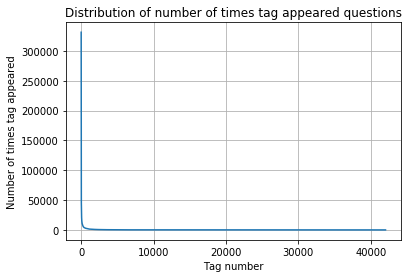

In [34]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

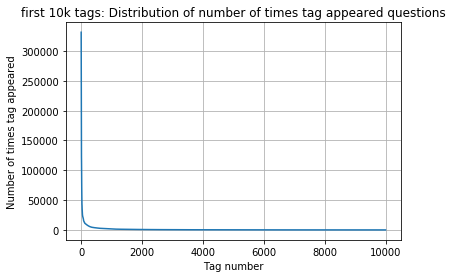

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [35]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

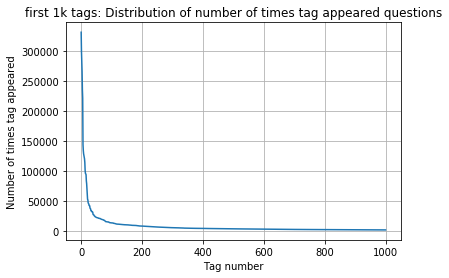

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [36]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

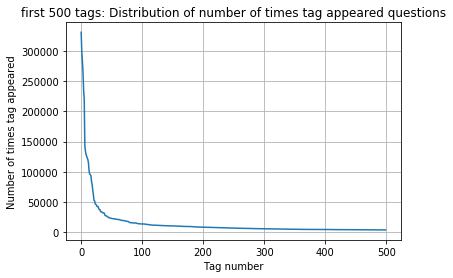

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [37]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

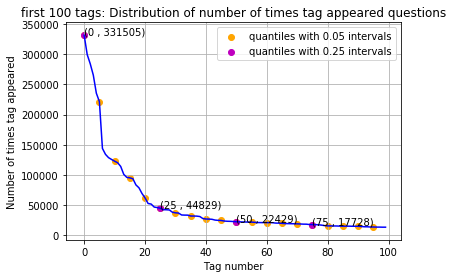

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [38]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [39]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [40]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting each value in the 'tag_quest_count' to integer.
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206307 datapoints.
[3, 4, 2, 2, 3]


In [41]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899443


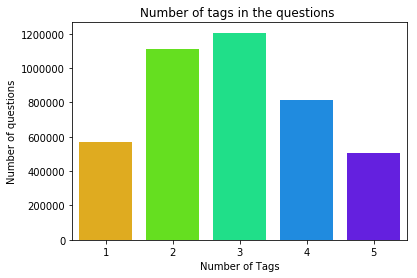

In [42]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

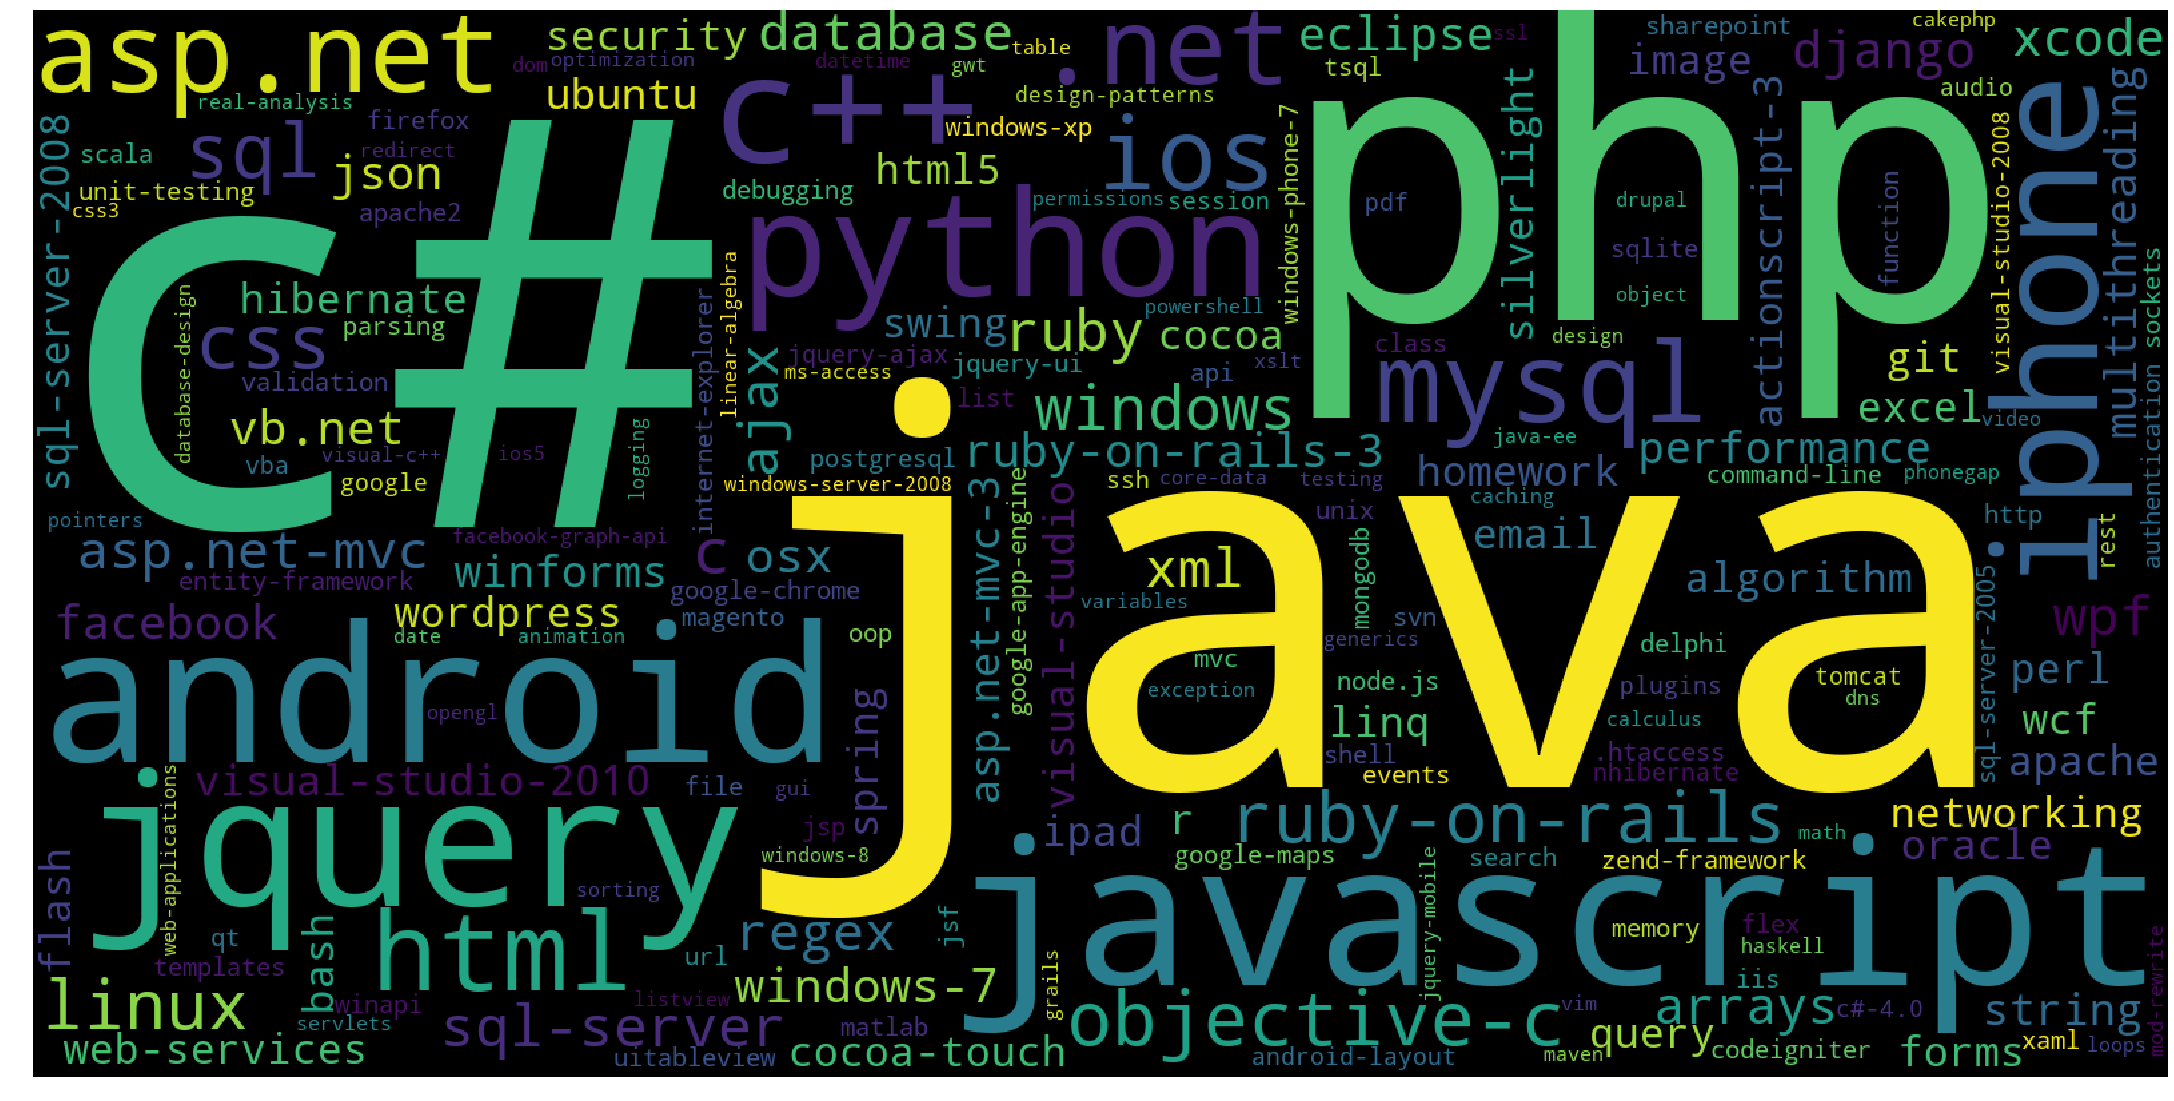

Time taken to run this cell : 0:00:03.542524


In [43]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

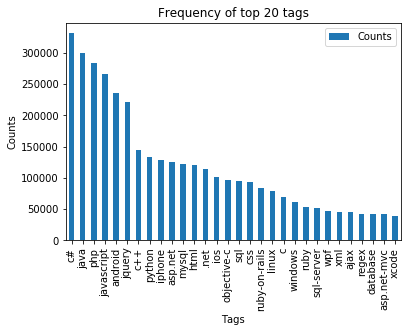

In [44]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 4. Cleaning and preprocessing of Questions </h3>

<h3> 4.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Sampling 0.5million datapoints </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [45]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/saikrishna6680/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/saikrishna6680/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [47]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("3times_weighted_Title.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [50]:
!curl --header "Host: doc-04-9o-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9,zu;q=0.8,ca;q=0.7,sn;q=0.6,jv;q=0.5,fi;q=0.4,te;q=0.3" --header "Referer: https://drive.google.com/drive/folders/149ZLCNqL4WBdp-7Y3eHxcMHHhVvIWRSW" --header "Cookie: AUTH_d3dj321fcmktbv110hrr890j1p03cpd4_nonce=4jh2chh5dleum" --header "Connection: keep-alive" "https://doc-04-9o-docs.googleusercontent.com/docs/securesc/o6mi999kqdtifm75ce54p82jf7ddgjbc/3ag72chjb0i7enqoh084c6cu9esgcnob/1553529600000/06629147635963609455/04563076751847969025/1MUAVbg0jinwAGi9zwLJDo1K1wdRXKCFB?e=download&nonce=4jh2chh5dleum&user=04563076751847969025&hash=d9coll4h22l0eu5vq1vgll1hinvm912e" -o "Processed.db" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  984M    0  984M    0     0   169M      0 --:--:--  0:00:05 --:--:--  199M


In [51]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body,Tags From no_dup_train LIMIT 500000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:11.981732


In [52]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
from __future__ import division

import csv
import pip 
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    title, question, tags, = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question except for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(Title+Body) after processing: 341
Percent of questions containing code: 57
Time taken to run this cell : 0:11:06.873162


In [53]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Sample quesitons after preprocessing of data __

In [54]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advanc',)
----------------------------------------------------------------------------------------------------
('java lang noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java lang noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl tomcat webapp tri project work also tri version jstl still messag caus solv',)
----------------------------------------------------------------------------------------------------
('java sql sqlexcept microsoft odbc driver manag invalid descriptor index use follow code display caus solv',)
----------------------------------------------------------------------------------------------------
('better way updat feed fb php sdk novic facebook

__ Saving Preprocessed data to a Database __

In [55]:
#Taking 0.5 Million entries to a dataframe.
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [56]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding
1,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding columns
2,java lang noclassdeffounderror javax servlet j...,jsp jstl
3,java sql sqlexcept microsoft odbc driver manag...,java jdbc
4,better way updat feed fb php sdk novic faceboo...,facebook api facebook-php-sdk


In [57]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 499999
number of dimensions : 2


In [58]:
preprocessed_data = preprocessed_data.drop_duplicates(subset={'question'})


In [59]:
start = datetime.now()
#Splitting text in tags
preprocessed_data["tag_count"] = preprocessed_data["tags"].apply(lambda text: len(text.split(" ")) if text!=None else 0)
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
preprocessed_data.head()

Time taken to run this cell : 0:00:00.442458


,question,tags,tag_count
0,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding,3
2,java lang noclassdeffounderror javax servlet j...,jsp jstl,2
3,java sql sqlexcept microsoft odbc driver manag...,java jdbc,2
4,better way updat feed fb php sdk novic faceboo...,facebook api facebook-php-sdk,3
5,btnadd click event open two window record ad o...,javascript asp.net web,3


In [60]:
#Removing question without any tags¶
preprocessed_data = preprocessed_data[preprocessed_data['tag_count']!=0]


In [61]:
#knowing length and converts the specified value into a string.
preprocessed_data['questionlen'] = preprocessed_data['question'].str.len() 

In [62]:
#splitting the row
preprocessed_data['question_words'] = preprocessed_data['question'].apply(lambda row: len(row.split(" ")))

In [63]:
#printing minimum length of questions in question-1
print ("Minimum length of the Text in Title : " , min(preprocessed_data['question_words']))

Minimum length of the Text in Title :  1


In [64]:
preprocessed_data

,question,tags,tag_count,questionlen,question_words
0,dynam datagrid bind silverlight bind datagrid ...,c# silverlight data-binding,3,185,29
2,java lang noclassdeffounderror javax servlet j...,jsp jstl,2,311,45
3,java sql sqlexcept microsoft odbc driver manag...,java jdbc,2,105,16
4,better way updat feed fb php sdk novic faceboo...,facebook api facebook-php-sdk,3,163,30
5,btnadd click event open two window record ad o...,javascript asp.net web,3,195,33
6,sql inject issu prevent correct form submiss p...,php forms,2,515,90
7,countabl subaddit lebesgu measur let lbrace rb...,real-analysis measure-theory,2,500,81
8,hql equival sql queri hql queri replac name cl...,hibernate hql,2,85,15
9,undefin symbol architectur objc class skpsmtpm...,iphone email-integration,2,353,46
10,java lang nosuchmethoderror javax servlet serv...,java servlets jboss,3,892,121


In [65]:
preprocessed_data.describe()
print(preprocessed_data.(include='all'))
print("*"*60)
print(preprocessed_data.info())


************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 493322 entries, 0 to 499998
Data columns (total 5 columns):
question          493322 non-null object
tags              493322 non-null object
tag_count         493322 non-null int64
questionlen       493322 non-null int64
question_words    493322 non-null int64
dtypes: int64(3), object(2)
memory usage: 22.6+ MB
None


Here as you can notice mean value is less than median value of each column which is represented by 50%(50th percentile) in index column.

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”.

Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

<h3> checking correlation </h3>

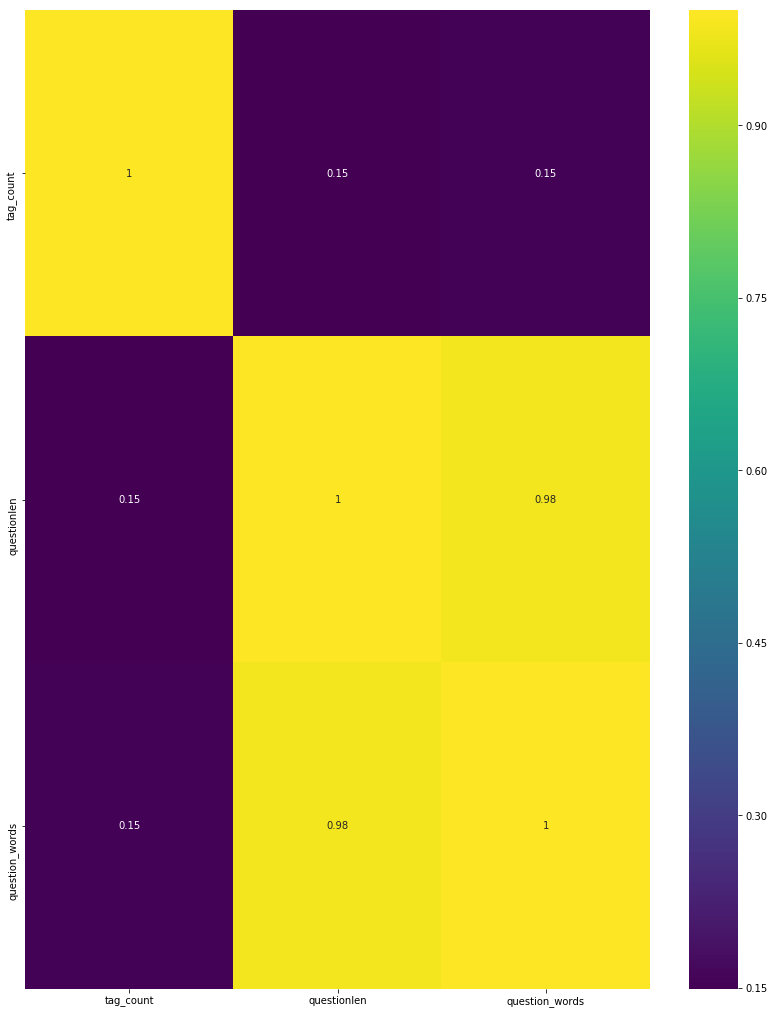

In [66]:
f, ax = plt.subplots(figsize=(14,18))
corr = preprocessed_data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True, cmap = 'viridis')


correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1.The diagonal elements of the matrix value are always 1

<h1>5. Machine Learning Models </h1>

<h2> 5.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

- Converting string Tags to multilable output variables __ 

In [67]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

- We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [68]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

__ Selecting 500 Tags __

In [69]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

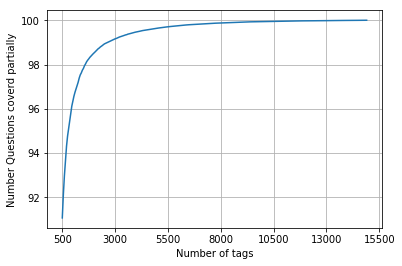

with  5500 tags we are covering  99.161 % of questions
with  500 tags we are covering  91.07 % of questions


In [70]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [71]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 44052 out of  493322


In [72]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 29372
number of tags taken : 500 ( 1.7023015116437425 %)


__ We consider top 15% tags which covers  99% of the questions __

<h2>5.2 Split the data into test and train (80:20) </h2>

In [73]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:preprocessed_data.shape[0],:]

In [74]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (394657, 500)
Number of data points in test data : (98665, 500)


<h3> 5.2.1 Featurizing data with BOW vectorizer upto 4 grams and compute the micro f1 score with Logistic regression(OvR) </h3>

In [75]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=200000,tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:08:01.998748


In [76]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (394657, 96397) Y : (394657, 500)
Dimensions of test data X: (98665, 96397) Y: (98665, 500)


In [ ]:
24

<h3> 5.2.3 Applying Logistic Regression with OneVsRest Classifier </h3>

In [77]:
import pickle
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(x_train_multilabel, y_train)

# save the model to disk
filename = 'Applying Logistic Regression with OneVsRest Classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:25:55.275728


In [78]:
# save the model to disk
filename = 'Applying Logistic Regression with OneVsRest Classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))



Time taken to run this cell : 0:25:56.689720


In [79]:
predictions = loaded_model.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.10497136775959054
Hamming loss  0.005345583540262504
Micro-average quality numbers
Precision: 0.3159, Recall: 0.4573, F1-measure: 0.3737
Macro-average quality numbers
Precision: 0.2261, Recall: 0.3905, F1-measure: 0.2790
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      5497
           1       0.43      0.45      0.44      8157
           2       0.50      0.52      0.51      6471
           3       0.45      0.50      0.47      3203
           4       0.56      0.49      0.52      6398
           5       0.46      0.51      0.48      2860
           6       0.61      0.58      0.59      5018
           7       0.64      0.65      0.64      4504
           8       0.24      0.22      0.23      2985
           9       0.56      0.66      0.61      2750
          10       0.32      0.29      0.30      3036
          11       0.44      0.49      0.47      3006
          12       0.39      0.38      0.39      2621
         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> 5.2.4 Applying Logistic Regression with OneVsRest Classifier Hyper Parameter Tunning</h3>

In [80]:
# applying grid search to find best c 
from sklearn.model_selection import GridSearchCV
start = datetime.now()
tuned_parameters = [{'estimator__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01]}]
    
model = GridSearchCV(OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1')), tuned_parameters, scoring = 'f1_micro', cv = 2)
model.fit(x_train_multilabel, y_train)

# save the model to disk
filename = 'Applying Logistic Regression with OneVsRest Classifier Hyper Parameter Tunning.sav'
pickle.dump(model, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 2:33:33.574932


In [81]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

print(loaded_model.best_estimator_)
a = loaded_model.best_params_
optimal_alpha = a.get('estimator__alpha')
print(optimal_alpha)


OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)
0.0001


In [82]:
results = loaded_model.cv_results_
results['mean_test_score']

array([0.38103605, 0.36787449, 0.42033243, 0.36129053, 0.151717  ])

C=0.000001, 0.00001, 0.0001, 0.001, 0.01
plt.plot(C,results['mean_test_score'],marker='o')
plt.xlabel('alpha')
plt.ylabel('f1score')
plt.title("F1score vs hyperparameter alpha")
plt.grid()
plt.show()

In [84]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=optimal_alpha, penalty='l1'))
classifier.fit(x_train_multilabel, y_train)
# save the model to disk
filename = 'Applying Logistic Regression with OneVsRest Classifier Hyper Parameter Tunning with alpha.sav'
pickle.dump(classifier, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:18:54.884941


In [85]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [86]:
predictions = loaded_model.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.13149546445041302
Hamming loss  0.004047149445091978
Micro-average quality numbers
Precision: 0.4185, Recall: 0.4120, F1-measure: 0.4152
Macro-average quality numbers
Precision: 0.3159, Recall: 0.3437, F1-measure: 0.3138
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      5497
           1       0.43      0.39      0.41      8157
           2       0.60      0.42      0.50      6471
           3       0.46      0.45      0.45      3203
           4       0.61      0.47      0.53      6398
           5       0.51      0.50      0.50      2860
           6       0.66      0.55      0.60      5018
           7       0.69      0.62      0.65      4504
           8       0.29      0.18      0.23      2985
           9       0.58      0.65      0.61      2750
          10       0.36      0.27      0.31      3036
          11       0.52      0.46      0.49      3006
          12       0.42      0.36      0.39      2621
         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7

<h3> 5.2.5 Applying Linear SVM with OneVsRest Classifier </h3>

In [87]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'))
classifier.fit(x_train_multilabel, y_train)
# save the model to disk
filename = 'Applying Linear SVM with OneVsRest Classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:22:58.137894


In [88]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [89]:
predictions = loaded_model.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.10553894491461005
Hamming loss  0.005279704049054883
Micro-average quality numbers
Precision: 0.3192, Recall: 0.4538, F1-measure: 0.3748
Macro-average quality numbers
Precision: 0.2265, Recall: 0.3871, F1-measure: 0.2785
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      5497
           1       0.42      0.47      0.44      8157
           2       0.53      0.48      0.50      6471
           3       0.46      0.50      0.48      3203
           4       0.56      0.49      0.52      6398
           5       0.45      0.54      0.49      2860
           6       0.58      0.59      0.58      5018
           7       0.63      0.64      0.64      4504
           8       0.24      0.24      0.24      2985
           9       0.55      0.68      0.60      2750
          10       0.34      0.32      0.33      3036
          11       0.47      0.50      0.48      3006
          12       0.42      0.37      0.39      2621
         

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> 5.2.6 Applying Linear SVM with OneVsRest Classifier Hyper Parameter Tunning</h3>

In [90]:
# applying grid search to find best c 
from sklearn.model_selection import GridSearchCV
start = datetime.now()
tuned_parameters = [{'estimator__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01]}]
    
model = GridSearchCV(OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1')), tuned_parameters, scoring = 'f1_micro', cv = 2)
model.fit(x_train_multilabel, y_train)

# save the model to disk
filename = 'Applying Linear SVM with OneVsRest Classifier Hyper Parameter Tunning.sav'
pickle.dump(model, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 2:06:59.542693


In [91]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

print(loaded_model.best_estimator_)
optimal_alpha = a.get('estimator__alpha')
print(optimal_alpha)


OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)
0.0001


In [92]:
results = loaded_model.cv_results_
results['mean_test_score']

array([0.38069522, 0.37152447, 0.41355929, 0.37360015, 0.14186956])

C=0.000001, 0.00001, 0.0001, 0.001, 0.01
plt.plot(C,results['mean_test_score'],marker='o')
plt.xlabel('alpha')
plt.ylabel('f1score')
plt.title("F1score vs hyperparameter alpha")
plt.grid()
plt.show()

In [93]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=optimal_alpha, penalty='l1'))
classifier.fit(x_train_multilabel, y_train)
# save the model to disk
filename = 'Applying Linear SVM with OneVsRest Classifier Hyper Parameter Tunning with alpha.sav'
pickle.dump(classifier, open(filename, 'wb'))
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:18:45.884876


In [94]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [95]:
predictions = loaded_model.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)## Conclusion

Accuracy : 0.12932650889373132
Hamming loss  0.00407339988851163
Micro-average quality numbers
Precision: 0.4149, Recall: 0.4096, F1-measure: 0.4122
Macro-average quality numbers
Precision: 0.3146, Recall: 0.3438, F1-measure: 0.3131
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5497
           1       0.44      0.36      0.40      8157
           2       0.58      0.44      0.50      6471
           3       0.48      0.46      0.47      3203
           4       0.63      0.44      0.52      6398
           5       0.55      0.49      0.52      2860
           6       0.66      0.56      0.60      5018
           7       0.68      0.61      0.64      4504
           8       0.28      0.17      0.21      2985
           9       0.54      0.68      0.60      2750
          10       0.40      0.18      0.25      3036
          11       0.53      0.49      0.51      3006
          12       0.44      0.36      0.39      2621
          

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7

<h2> 6.Conclusion </h2>

In [101]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Classification model","Regularization","Hyperparameter", "Accuracy","precision","Recall","F1 micro","Hammingloss"]

x.add_row(["Logistic Regression", "L1",0.00001,0.1049,0.3159,0.4573, 0.3737,0.0054])
x.add_row(["Logistic Regression with Hyperparameter", "L1",0.001,0.1314,0.4185,0.4120,0.4152,0.0040])
x.add_row(["Linear SVM", "L1",0.00001,0.1055,0.3192,0.4538,0.3748,0.0052])
x.add_row(["Linear SVM with Hyperparameter", "L1", 0.001,0.1293,0.4149,0.4096,0.4122,0.0040])
print(x)


+-----------------------------------------+----------------+----------------+----------+-----------+--------+----------+-------------+
|           Classification model          | Regularization | Hyperparameter | Accuracy | precision | Recall | F1 micro | Hammingloss |
+-----------------------------------------+----------------+----------------+----------+-----------+--------+----------+-------------+
|           Logistic Regression           |       L1       |     1e-05      |  0.1049  |   0.3159  | 0.4573 |  0.3737  |    0.0054   |
| Logistic Regression with Hyperparameter |       L1       |     0.001      |  0.1314  |   0.4185  | 0.412  |  0.4152  |    0.004    |
|                Linear SVM               |       L1       |     1e-05      |  0.1055  |   0.3192  | 0.4538 |  0.3748  |    0.0052   |
|      Linear SVM with Hyperparameter     |       L1       |     0.001      |  0.1293  |   0.4149  | 0.4096 |  0.4122  |    0.004    |
+-----------------------------------------+------------

we had nearly 50k tags don't require all tags to build our machine learning model.Hence we will use top 500 tags would cover 99% of questions which is 

sufficient for train model and get reasonably good micro F1_score




<h3> Steps Involved:- </h3>:-

1) Connecting SQL file

2) Reading Data

3) performed Feature extraction

4) Preprocessing of Tags(only 0.5 million questions ae considered and we select top 500 tags due to less computational power)

5) Exploratory Data Analysis

6) Spliting data into train and test based on time (80:20)

7) Distribution of y_i's in Train, Test 

8) Applying Machine learning Algorithms  Logistice Regression and Linear SVM  

9) Hyperparameter Tunning Model

10) calculating Accuracy,Precision Score,Recall Score,Classification Report

11) Conclusion

Here i skipped MSE vs alpha graph because its taking lot of time i had tried and waited 7hours so i skipped here